In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

In [2]:
from tqdm import tqdm

In [3]:
DATADIR = "E:/ImagesDataSet/OwnImages"

In [4]:
cATEGORIES = ["Veg","Frt"]

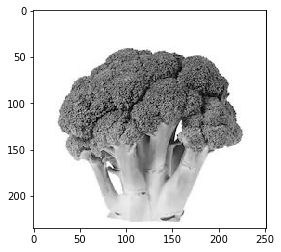

In [5]:
for category in cATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show(29)
        break
    break

In [6]:
print(img_array)

[[255 255 255 ... 253 255  23]
 [255 255 255 ... 253 255  23]
 [255 255 255 ... 253 255  23]
 ...
 [255 255 255 ... 253 255  23]
 [255 255 255 ... 253 255  23]
 [255 255 255 ... 253 255  23]]


In [7]:
print(img_array.shape)

(235, 252)


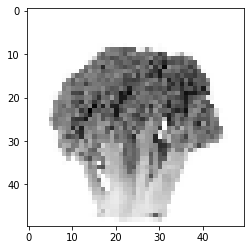

In [8]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [9]:
training_data = []
def create_training_data():
    for category in cATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = cATEGORIES.index(category)
        print(class_num)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                    pass

create_training_data()

0


100%|██████████| 5/5 [00:00<00:00,  6.79it/s]


1


100%|██████████| 5/5 [00:00<00:00,  8.47it/s]


In [10]:
import random
random.shuffle(training_data)


In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
0
0
1
0


In [12]:
X = []
y = []



In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
y

[0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

In [15]:
class_name = ['veg', 'frt']

In [16]:
for i in range(5): 
    print(y[i],class_name[y[i]])
    

0 veg
1 frt
1 frt
1 frt
1 frt


In [17]:
import pickle

In [18]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [23]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)